<a href="https://colab.research.google.com/github/shrutikamokashi/Amazon-Reviews-for-Sentiment-Analysis/blob/master/Amazon_Final_report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Team: EAI 6000 (Winter 2020) : Capstone Project

*    Shrutika Mokashi
*    Yashmi Sevak
*    Janaki Sajja

### Last week link description: 
•	Initially while submitting last week’s project initial report, our topic that we submitted was ‘Sentiment Analysis Using Twitter Data’ and we had created a developer account and waiting for twitter to approve it. But unfortunately, we did not receive any kind of response from them and so we choose to keep the methodology and techniques same but use Amazon review data for out Sentiment Analysis.

## Hands on sentiment analysis

Project Description- We are implementing Sentiment Analysis using Amazon reviews. We are using datasets to fetch data and implement text segmentation using NLP. The text is the reviews and it will be divided into positive, negative and neutral review also. Using various models, our goal is finding the best accuracy using a best fit model.

Team: EAI 6000 (Capstone Project)

1. Shrutika Mokashi
2. Yashmi Sevak
3. Janaki Sajja

# What is Sentiment Analysis? And why?

Analysis of emotion is omnipresent, and is a method of classification based on natural language processing. Judging whether a sentence (or article) is positive or negative is the key problem to be solved. 
Dealing with an sentiment can significantly enhance people's perception of situations, and can also use the results of an analysis of feelings to benefit certain people or things.
For example,
Government should comprehend the feeling of people against some events to maintain peace. Consequently, they are able to understand the nature of public opinion and perform timely and efficient monitoring of public opinion.

This dataset is made up of a few million Amazon customer reviews (text input) and star ratings (labels output) to learn how to train fastText for sentiment analysis.

*   Content:
The fastText supervised learning tutorial requires data in the following format:
__label__<X> __label__<Y> ... <Text>
where X and Y are the class names. No quotes, all on one line.

*   In this case, the classes are 
1. __label__1 : corresponds to 1- and 2-star reviews
2. __label__2 : corresponds to 4- and 5-star reviews

3. 3-star reviews i.e. reviews with neutral sentiment were not included in the original
*   There is only one class per row.
*   The review titles, followed by ':' and a space, are prepended to the text.

*   Most of the reviews are in English, but there are a few in other languages, like Spanish.

*   Source: The data was lifted from Xiang Zhang's Google Drive, in .csv format, which was not suitable for fastText.

*   To train: ./fasttext supervised -input train.ft.txt -output model_amzn
*   To test: ./fasttext test model_amzn.bin test.ft.txt

We can also train and test in Python, but we used datasets provided at below link,

https://www.kaggle.com/bittlingmayer/amazonreviews

which were in given i.e. fastText format.

## The flow of the project are as follows:

#### 1. Text cleaning
Lower all characters
Remove punctuation
Remove special characters
We thought of changing special characters to ascii code but then it was time consuming so overlooked that part
#### 2. Text preprocessing
Transform text into proper format to use in the models :
Tokenizer

pad_sequences

#### 3. Modeling
NLTK Naive Byes

Fast Text Model

CNN

RNN

In [0]:
# Run this to ensure TensorFlow 2.x is used
try:
  # %tensorflow_version only exists in Colab.
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.python.keras import models, layers, optimizers
from collections import Counter 
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
import bz2
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score
import re
import gc

%matplotlib inline

## Reading the text

The wording is in a simplified format. The first word gives the mark, so we need to translate that to a number and then take the rest as the statement.

In [0]:
def get_labels_and_texts(file):
    labels = []
    texts = []
    for line in bz2.BZ2File(file):
        x = line.decode("utf-8")
        labels.append(int(x[9]) - 1)
        texts.append(x[10:].strip())
    return np.array(labels), texts

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
cd 'drive/My Drive/python'

/content/drive/My Drive/python


### Reading the fast text file.

In [0]:
# For CNN, RNN
train_labels, train_texts = get_labels_and_texts('train.ft.txt.bz2')
test_labels, test_texts = get_labels_and_texts('test.ft.txt.bz2')

In [0]:
# For NLTK
train_file = bz2.BZ2File('train.ft.txt.bz2')
test_file = bz2.BZ2File('test.ft.txt.bz2')

### Data Exploration

In [0]:
train_file_lines = train_file.readlines()
test_file_lines = test_file.readlines()
del train_file, test_file
gc.collect()

26

In [0]:
## Convert from raw binary strings to strings that can be parsed
train_file_lines = [x.decode('utf-8') for x in train_file_lines]
test_file_lines = [x.decode('utf-8') for x in test_file_lines]

In [0]:
train_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in train_file_lines]
train_sentences = [x.split(' ', 1)[1][:-1].lower() for x in train_file_lines]

for i in range(len(train_sentences)):
    train_sentences[i] = re.sub('\d','0',train_sentences[i])
    
test_labels = [0 if x.split(' ')[0] == '__label__1' else 1 for x in test_file_lines]
test_sentences = [x.split(' ', 1)[1][:-1].lower() for x in test_file_lines]

for i in range(len(test_sentences)):
    test_sentences[i] = re.sub('\d','0',test_sentences[i])
                                                       
for i in range(len(train_sentences)):
    if 'www.' in train_sentences[i] or 'http:' in train_sentences[i] or 'https:' in train_sentences[i] or '.com' in train_sentences[i]:
        train_sentences[i] = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", "<url>", train_sentences[i])
        
for i in range(len(test_sentences)):
    if 'www.' in test_sentences[i] or 'http:' in test_sentences[i] or 'https:' in test_sentences[i] or '.com' in test_sentences[i]:
        test_sentences[i] = re.sub(r"([^ ]+(?<=\.[a-z]{3}))", "<url>", test_sentences[i])


In [0]:
train_sentences[0]

'stuning even for the non-gamer: this sound track was beautiful! it paints the senery in your mind so well i would recomend it even to people who hate vid. game music! i have played the game chrono cross but out of all of the games i have ever played it has the best music! it backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras. it would impress anyone who cares to listen! ^_^'

## Using NLTK Naive Bayes

### Preprocessing for Naive Bayes

In [0]:
# For example, here's several helpful packages to load in 
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
%matplotlib inline

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

from subprocess import check_output


In [0]:
# Create train and test dataframes
Na_train = {'Sentence': train_sentences, 'Label': train_labels}
Nav_train = pd.DataFrame(Na_train)

Na_test = {'Sentence': test_sentences, 'Label': test_labels}
Nav_test = pd.DataFrame(Na_test)

Nav_train.head()

Nav_train = Nav_train.head(900)
Nav_test = Nav_test.head(100)

### Separate Positive and Negative tweets

In [0]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

### Cleaning and Feature Extraction

In [0]:
sents = []
alll = []
stopwords_set = set(stopwords.words("english"))

for index, row in Nav_train.iterrows():
    words_filtered = [e.lower() for e in row.Sentence.split() if len(e) >= 3]
    words_cleaned = [word for word in words_filtered
        if 'http' not in word
        and not word.startswith('@')
        and not word.startswith('#')
        and word != 'RT']
    words_without_stopwords = [word for word in words_cleaned if not word in stopwords_set]
    sents.append((words_without_stopwords, row.Label))
    alll.extend(words_without_stopwords )

In [0]:
def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features

In [0]:
w_features = get_word_features(alll)

In [0]:
# TESTING BELOW
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

In [0]:
# Training the Naive Bayes classifier
training_set = nltk.classify.apply_features(extract_features,sents)
classifier = nltk.NaiveBayesClassifier.train(training_set)
train_pos = Nav_train[Nav_train['Label'] == 1]
train_pos = train_pos['Sentence']
train_neg = Nav_train[Nav_train['Label'] == 0]
train_neg = train_neg['Sentence']
test_pos = Nav_test[Nav_test['Label'] == 1]
test_pos = test_pos['Sentence']
test_neg = Nav_test[Nav_test['Label'] == 0]
test_neg = test_neg['Sentence']
test_neg.head(40)

2     batteries died within a year ...: i bought thi...
5     dvd player crapped out after one year: i also ...
6     incorrect disc: i love the style of this, but ...
7     dvd menu select problems: i cannot scroll thro...
9     not an "ultimate guide": firstly,i enjoyed the...
11    not!: if you want to listen to el duke , then ...
12    a complete bust: this game requires quicktime ...
14    didn't run off of usb bus power: was hoping th...
15    don't buy!: first of all, the company took my ...
20    long and boring: i've read this book with much...
21    dont like it: this product smells when you ope...
24    don't take the chance - get the se branded cab...
25    waste of money!: like many of the barbie cd ro...
27    has no range: i suppose if you were going to s...
29    three days of use and it broke: very disappoin...
35    not as expected...: my children get easily bor...
37    doublecharged for shipping because merchant wa...
39    light reading, light in substance: a clich

### Data Visualization

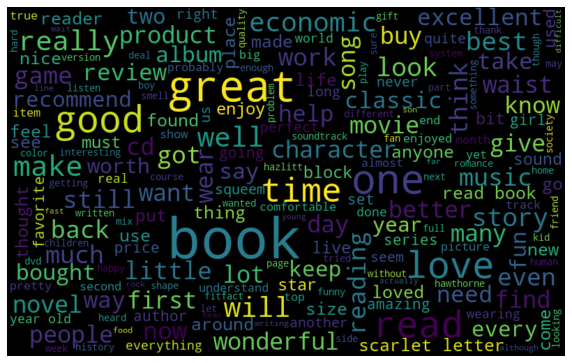

In [0]:
# Creating word Cloud for positive Words in all training dataset
from wordcloud import WordCloud
allWords = ' '.join([text for text in train_pos])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=80).generate(allWords)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

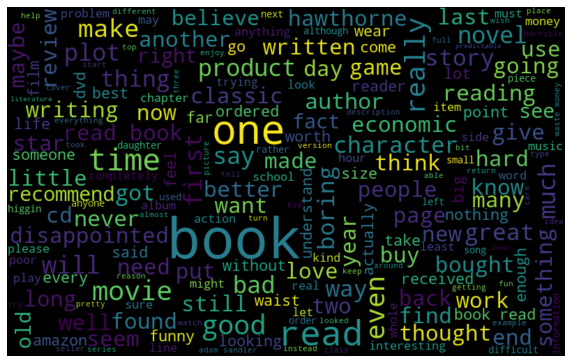

In [0]:
# Creating word Cloud for negative Words in all training dataset
from wordcloud import WordCloud
allWords = ' '.join([text for text in train_neg])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=80).generate(allWords)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

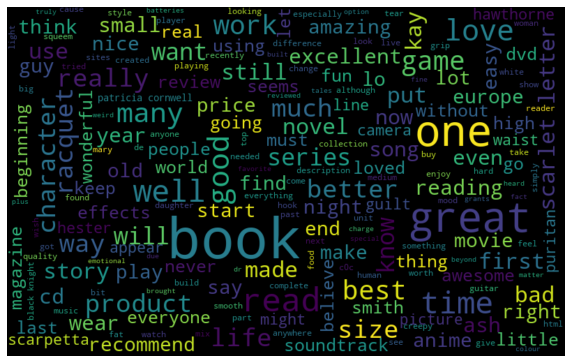

In [0]:
# Creating word Cloud for positive Words in all testing dataset
from wordcloud import WordCloud
allWords = ' '.join([text for text in test_pos])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=80).generate(allWords)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

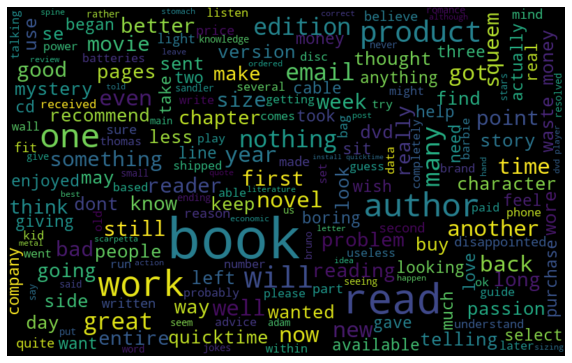

In [0]:
# Creating word Cloud for negative Words in all testing dataset
from wordcloud import WordCloud
allWords = ' '.join([text for text in test_neg])
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=80).generate(allWords)
plt.figure(figsize=(10, 10)) 
plt.imshow(wordcloud, interpolation="bilinear") 
plt.axis('off') 
plt.show()

In [0]:
neg_cnt = 0
pos_cnt = 0
for obj in test_neg: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 0): 
        neg_cnt = neg_cnt + 1
for obj in test_pos: 
    res =  classifier.classify(extract_features(obj.split()))
    if(res == 1): 
        pos_cnt = pos_cnt + 1
        
print('[Negative]: %s/%s '  % (len(test_neg),neg_cnt))        
print('[Positive]: %s/%s '  % (len(test_pos),pos_cnt))  

[Negative]: 47/42 
[Positive]: 53/40 


In [0]:
#aa = classifier.evaluate(Nav_test['Sentence'],Nav_test['Label'])
acccc= ((neg_cnt+pos_cnt)/(len(test_neg)+len(test_pos))) * 100
print("Accuracy by nltk classifier is", acccc)

Accuracy by nltk classifier is 82.0


NLTK Classifier gives 82% accuracy. Now lets try CNN and then RNN models.

### FastText supervised model

FastText is well known for its distributed representation, which is essentially used in a traditional Deep Learning model such as a CNN or a LSTM as an embedding layer. Many don't know, though, that FastText is a supervised model too. This Amazon dataset was created to support the FastText format, to prove the point.

What others don't even know is that, it's just a pretty good supervised model. Possibly one of the fastest out there and the best without using a GPU.

A minor downside with the FastText model is the need to transfer the dataset to a text file. And the irritating " label #" encoding. The goal and the text are all in the same cell, literally. They're identified by the ' label #' suffix. If you have two labels and one is 'Ham' and the other 'Spam' so the labels are ' label Ham' and ' label Spam.' Also, WE can have as many labels, not just 2. 

Thankfully, as you can see from the first 5 records I printed out, this dataset was already formed in that way. 

In [0]:
!pip install fasttext
import fasttext
import csv

     |████████████████████████████████| 61kB 1.9MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.1-cp36-cp36m-linux_x86_64.whl size=2388115 sha256=c391d565aa123299422ecd807af23cfde828e8055df81f48f6ef1989f26217e1
  Stored in directory: /root/.cache/pip/wheels/9f/f0/04/caa82c912aee89ce76358ff954f3f0729b7577c8ff23a292e3
Successfully built fasttext


In [0]:
# interpret the training data

print("Length of Train file : "+str(len(train_file_lines))) 
# Data Prep
data = pd.DataFrame(train_file_lines,columns={'target'})
data.head()
data.to_csv("train.txt", index=False, sep=' ', header=False, quoting=csv.QUOTE_NONE, quotechar="", escapechar=" ")

# Modelling
# This routine takes about 5 to 10 minutes 
model = fasttext.train_supervised('train.txt',label_prefix='__label__', thread=4, epoch = 10)
print(model.labels, 'are the labels or targets the model is predicting')

Length of Train file : 3600000
['__label__1', '__label__2'] are the labels or targets the model is predicting


In [0]:
print(len(test_file_lines), 'number of records in the test set') 

# To run the predict function, we need to remove the __label__1 and __label__2 from the testset.  
new = [w.replace('__label__2 ', '') for w in test_file_lines]
new = [w.replace('__label__1 ', '') for w in new]
new = [w.replace('\n', '') for w in new]

# Use the predict function 
pred = model.predict(new)

# check the first record outputs
print(pred[0][0], 'is the predicted label')
print(pred[0][1], 'is the probability score')

400000 number of records in the test set
['__label__2'] is the predicted label
['__label__2'] is the probability score


In [0]:
# Lets recode the actual targets to 1's and 0's from both the test set and the actual predictions  
# run the accuracy measure. 
print(roc_auc_score([0 if x.split(' ')[0] == '__label__1' else 1 for x in test_file_lines], [0 if x == ['__label__1'] else 1 for x in pred[0]]
))

0.917315


### FastText supervised model gives accuracy of 91.7%.
It is one of the fastest and most accessible text classifier.

In [0]:
lab1_count = data['target'].str.contains('__label__1').sum()
if lab1_count>0:
    print ("There are {m}  1- and 2-star reviews".format(m=lab1_count))

lab2_count = data['target'].str.contains('__label__2').sum()
if lab2_count>0:
    print ("There are {m}  4- and 5-star reviews".format(m=lab2_count))

There are 1800000  1- and 2-star reviews
There are 1800000  4- and 5-star reviews


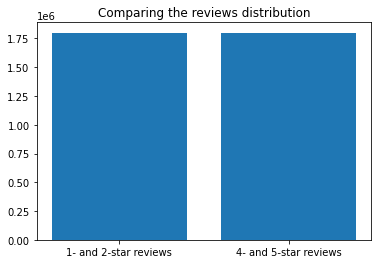

In [0]:
##let's check the reviews distribution
accuracy_array = [lab1_count, lab2_count]
models_used = ['1- and 2-star reviews', '4- and 5-star reviews']
Accuracy_pos = np.arange(len(models_used))
plt.bar(Accuracy_pos, accuracy_array)
plt.xticks(Accuracy_pos, models_used)
plt.title('Comparing the reviews distribution')
plt.show()

The distribution between two lables is perfectly balanced.

50% data has 1 & 2 start rating.

50% data has 4 & 5 start rating.

## Text Preprocessing
(For Fast text, CNN, RNN)

The first thing we must do is to process the text.
1. Lower it all
2. Then delete non-word characters. I replace these with spaces. (Most would be punctuation.) 
3. Delete any other characters.

It would be easier to replace some of these with standard ascii characters but here we are overlooking that. This also points out that there are very few uncommon characters (if you look at the counts of the various characters).

In [0]:
import re
NON_ALPHANUM = re.compile(r'[\W]')
NON_ASCII = re.compile(r'[^a-z0-1\s]')
def normalize_texts(texts):
    normalized_texts = []
    for text in texts:
        lower = text.lower()
        no_punctuation = NON_ALPHANUM.sub(r' ', lower)
        no_non_ascii = NON_ASCII.sub(r'', no_punctuation)
        normalized_texts.append(no_non_ascii)
    return normalized_texts
        
train_texts = normalize_texts(train_texts)
test_texts = normalize_texts(test_texts)

In [0]:
train_texts

['stuning even for the non gamer  this sound track was beautiful  it paints the senery in your mind so well i would recomend it even to people who hate vid  game music  i have played the game chrono cross but out of all of the games i have ever played it has the best music  it backs away from crude keyboarding and takes a fresher step with grate guitars and soulful orchestras  it would impress anyone who cares to listen    ',
 'the best soundtrack ever to anything   i m reading a lot of reviews saying that this is the best  game soundtrack  and i figured that i d write a review to disagree a bit  this in my opinino is yasunori mitsuda s ultimate masterpiece  the music is timeless and i m been listening to it for years now and its beauty simply refuses to fade the price tag on this is pretty staggering i must say  but if you are going to buy any cd for this much money  this is the only one that i feel would be worth every penny ',
 'amazing   this soundtrack is my favorite music of all 

In [0]:
# Pass the split list to instance of Counter class. 
# most_common() produces k frequently encountered 
# input values and their respective counts. 
from collections import Counter 
most_occur = Counter(str(test_texts).split()).most_common(10000) 
#most_occur = Counter(str(test_texts).split())
print(most_occur)

[('the', 1585688), ('i', 918177), ('and', 857745), ('a', 784502), ('to', 769025), ('it', 716783), ('of', 630300), ('this', 582763), ('is', 551676), ("',", 372440), ('in', 370481), ('for', 352580), ('that', 320891), ('you', 275906), ('was', 267164), ('not', 243661), ('but', 233688), ('s', 233623), ('with', 230137), ('on', 226377), ('book', 218060), ('t', 214378), ('have', 206674), ('my', 204552), ('as', 175840), ('are', 173666), ('one', 149736), ('be', 143009), ('so', 128190), ('all', 127461), ('if', 120907), ('they', 117299), ('like', 114224), ('very', 111197), ('at', 106031), ('good', 105024), ('from', 104713), ('just', 102626), ('great', 99035), ('or', 95793), ('can', 93969), ('would', 93462), ('out', 91837), ('about', 91377), ('an', 88714), ('me', 87309), ('has', 86079), ('what', 83879), ('more', 81200), ('had', 80100), ('will', 79727), ('there', 78387), ('read', 77651), ('when', 77639), ('up', 76543), ('get', 76128), ('by', 75654), ('time', 74666), ('no', 73889), ('your', 71590), (

In [0]:
keyword_list = ['movie', 'book', 'dress', 'dvd','bag', 'shoe', 'band', 'song','series','album', 'cd', 'music', 'game','paint','camera','mobile','phone','earphone','computer','headphone','laptop','car','radio','guitar','tv','picture','coffee','film']

#if item in keyword_list in most_occur:
def Convert(tup, di): 
    for a, b in tup: 
        di.setdefault(a, []).append(b) 
    return di  
lst = most_occur
dict_most_occur = {}
Convert(lst,dict_most_occur)

{'the': [1585688],
 'i': [918177],
 'and': [857745],
 'a': [784502],
 'to': [769025],
 'it': [716783],
 'of': [630300],
 'this': [582763],
 'is': [551676],
 "',": [372440],
 'in': [370481],
 'for': [352580],
 'that': [320891],
 'you': [275906],
 'was': [267164],
 'not': [243661],
 'but': [233688],
 's': [233623],
 'with': [230137],
 'on': [226377],
 'book': [218060],
 't': [214378],
 'have': [206674],
 'my': [204552],
 'as': [175840],
 'are': [173666],
 'one': [149736],
 'be': [143009],
 'so': [128190],
 'all': [127461],
 'if': [120907],
 'they': [117299],
 'like': [114224],
 'very': [111197],
 'at': [106031],
 'good': [105024],
 'from': [104713],
 'just': [102626],
 'great': [99035],
 'or': [95793],
 'can': [93969],
 'would': [93462],
 'out': [91837],
 'about': [91377],
 'an': [88714],
 'me': [87309],
 'has': [86079],
 'what': [83879],
 'more': [81200],
 'had': [80100],
 'will': [79727],
 'there': [78387],
 'read': [77651],
 'when': [77639],
 'up': [76543],
 'get': [76128],
 'by': [75

In [0]:

dict_most_occur1 = dict_most_occur

In [0]:
productslist = []
productslistkey = []
productslistval = []
for item in keyword_list:
  for key,value in dict_most_occur.items():
    if (key == item):
      productslist.append([key, value])

for item in productslist:
    productslistkey.append(item[0])
for item in productslist:
    productslistval.append(item[1][0])

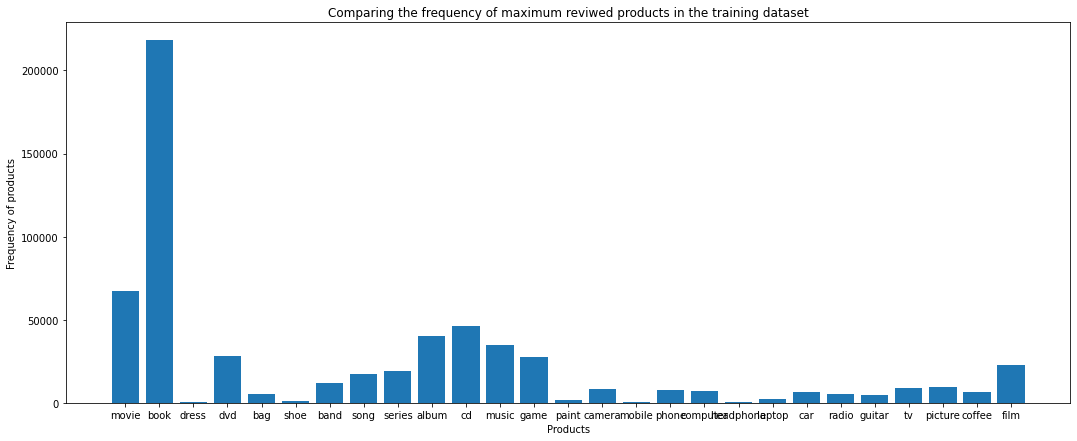

In [0]:
fig = plt.figure(figsize=(18,7))
plt.bar(productslistkey, productslistval)
plt.xlabel('Products')
plt.ylabel('Frequency of products')
plt.title('Comparing the frequency of maximum reviwed products in the training dataset')
plt.show()

In [0]:
review_list = ['good', 'better', 'best', 'amazing','bad', 'worse', 'wost', 'dislike','great','love','hated','nice','fun','interesting','loved','wonderful','favorite','poor','enjoyed','beautiful','awesome','disappointing','expensive','awful','excellent','entertaining','hate','fantastic','decent','enjoyable','impressed','annoying']
revlist = []
revlistkey = []
revlistval = []
for item in review_list:
  for key,value in dict_most_occur.items():
    if (key == item):
      revlist.append([key, value])

for item in revlist:
    revlistkey.append(item[0])
for item in revlist:
    revlistval.append(item[1][0])

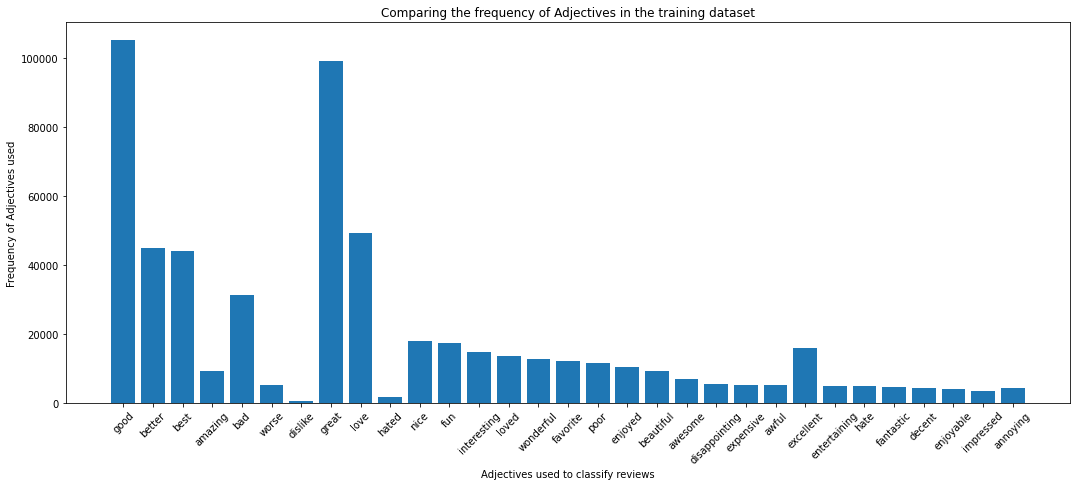

In [0]:
fig = plt.figure(figsize=(18,7))
plt.bar(revlistkey, revlistval)
plt.xlabel('Adjectives used to classify reviews')
plt.ylabel('Frequency of Adjectives used')
plt.xticks(rotation=45)
plt.title('Comparing the frequency of Adjectives in the training dataset')
plt.show()

## Train/Validation Split
We are setting aside 20% of the training set for validation.

In [0]:
from sklearn.model_selection import train_test_split
train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_texts, train_labels, random_state=57643892, test_size=0.2)

Keras provides tools for converting text to formats that are useful in deep learning models. Now we are running a Tokenizer using the top 12000 words as features.

In [0]:
MAX_FEATURES = 12000
tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(train_texts)
train_texts = tokenizer.texts_to_sequences(train_texts)
val_texts = tokenizer.texts_to_sequences(val_texts)
test_texts = tokenizer.texts_to_sequences(test_texts)

word_index = tokenizer.word_index
print('Number of unique words:',len(word_index))

Number of unique words: 790447


## Padding Sequences
To efficiently use sets, we would need to take the sequences and convert them into the same-length sequences. I would only make it the longest sentence in the training package here.

In [0]:
MAX_LENGTH = max(len(train_ex) for train_ex in train_texts)
train_texts = pad_sequences(train_texts, maxlen=MAX_LENGTH)
val_texts = pad_sequences(val_texts, maxlen=MAX_LENGTH)
test_texts = pad_sequences(test_texts, maxlen=MAX_LENGTH)

## Convolutional Neural Network (CNN) models to train and test:

Each input data will pass it through a series of convolution layers with filters , Pooling, fully connected layers (FC) and apply Softmax function to classify an object with probabilistic values between 0 and 1. 

The below figure is a complete flow of CNN to process an input image and classifies the objects based on values.


![alt text](https://miro.medium.com/max/1883/1*XbuW8WuRrAY5pC4t-9DZAQ.jpeg)

## Convolutional Neural Net Model

CNN has a 64, 3-layer embedding with the first two matching normalization and max pooling and the last one with regional max pooling. Afterwards the results are transferred to a dense layer and then the output.

In [0]:
def build_model():
    sequences = layers.Input(shape=(MAX_LENGTH,))
    embedded = layers.Embedding(MAX_FEATURES, 64)(sequences)
    x = layers.Conv1D(64, 3, activation='relu')(embedded)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool1D(3)(x)
    x = layers.Conv1D(64, 5, activation='relu')(x)
    x = layers.BatchNormalization()(x)
    x = layers.MaxPool1D(5)(x)
    x = layers.Conv1D(64, 5, activation='relu')(x)
    x = layers.GlobalMaxPool1D()(x)
    x = layers.Flatten()(x)
    x = layers.Dense(100, activation='relu')(x)
    predictions = layers.Dense(1, activation='sigmoid')(x)
    model = models.Model(inputs=sequences, outputs=predictions)
    model.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['binary_accuracy']
    )
    return model
    
model = build_model()

In [0]:
  x=np.array(train_texts)
  y=np.array(train_labels)
  history_cnn = model.fit(
    x, 
    y, 
    batch_size=128,
    epochs=4,
    validation_data=(np.array(val_texts), np.array(val_labels)), validation_split=0.1)

Epoch 1/4
20250/20250 [==============================] - 239s 12ms/step - loss: 0.1687 - binary_accuracy: 0.9359 - val_loss: 0.1488 - val_binary_accuracy: 0.9448
Epoch 2/4
20250/20250 [==============================] - 235s 12ms/step - loss: 0.1460 - binary_accuracy: 0.9462 - val_loss: 0.1459 - val_binary_accuracy: 0.9451
Epoch 3/4
20250/20250 [==============================] - 236s 12ms/step - loss: 0.1397 - binary_accuracy: 0.9492 - val_loss: 0.1473 - val_binary_accuracy: 0.9457
Epoch 4/4
20250/20250 [==============================] - 239s 12ms/step - loss: 0.1361 - binary_accuracy: 0.9507 - val_loss: 0.1450 - val_binary_accuracy: 0.9460


In [0]:
history_cnn.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

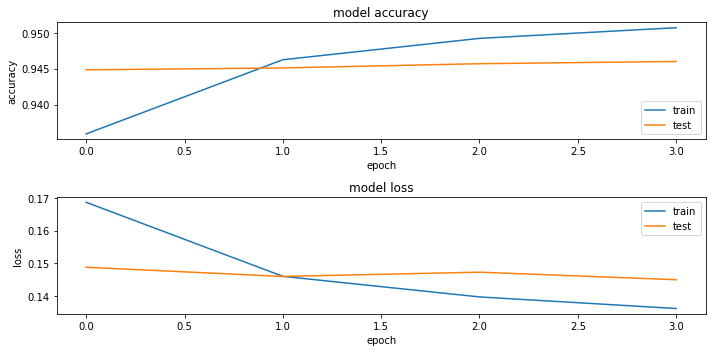

In [0]:
fig = plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.plot(history_cnn.history['binary_accuracy'])
plt.plot(history_cnn.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history_cnn.history['loss'])
plt.plot(history_cnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()

Once this finishes training, we should find that we get an accuracy of around 95% for this model.

In [0]:
preds = model.predict(test_texts)
print('Accuracy score: {:0.4}'.format(accuracy_score(test_labels, 1 * (preds > 0.5))))
print('F1 score: {:0.4}'.format(f1_score(test_labels, 1 * (preds > 0.5))))
print('ROC AUC score: {:0.4}'.format(roc_auc_score(test_labels, preds)))
A2='Accuracy score: {:0.4}'.format(accuracy_score(test_labels, 1 * (preds > 0.5)))

Accuracy score: 0.9455
F1 score: 0.9464
ROC AUC score: 0.9871


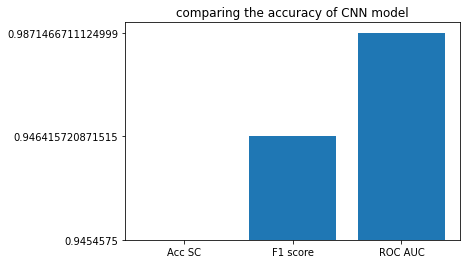

In [0]:
accuracy_array = [format(accuracy_score(test_labels, 1 * (preds > 0.5))),format(f1_score(test_labels, 1 * (preds > 0.5))),format(roc_auc_score(test_labels, preds))]
#accuracy_array = [0,10,20,0.9472,0.9475,0.9875]
models_used = ['Acc SC', 'F1 score', 'ROC AUC']
Accuracy_pos = np.arange(len(models_used))
plt.bar(Accuracy_pos, accuracy_array)
plt.xticks(Accuracy_pos, models_used)
plt.title('comparing the accuracy of CNN model')
plt.show()

## Recurrent Neural Net Model
I'm going to use a basic model for an RNN model too. This has an embedding, two layers of GRU, followed by 2 dense layers and the output layer afterwards. I use CuDNNGRU instead of GRU because the former runs much faster.

In [0]:
def build_rnn_model():
    sequences = layers.Input(shape=(MAX_LENGTH,))
    embedded = layers.Embedding(MAX_FEATURES, 64)(sequences)
    x = layers.CuDNNGRU(128, return_sequences=True)(embedded)
    x = layers.CuDNNGRU(128)(x)
    x = layers.Dense(32, activation='relu')(x)
    x = layers.Dense(100, activation='relu')(x)
    predictions = layers.Dense(1, activation='sigmoid')(x)
    model = models.Model(inputs=sequences, outputs=predictions)
    model.compile(
        optimizer='rmsprop',
        loss='binary_crossentropy',
        metrics=['binary_accuracy']
    )
    return model
    
rnn_model = build_rnn_model()

In [0]:
  x=np.array(train_texts)
  y=np.array(train_labels)

history_rnn = rnn_model.fit(
    x, 
    y, 
    batch_size=128,
    epochs=4,
    validation_data=(np.array(val_texts), np.array(val_labels)), validation_steps=0.1)


Epoch 1/4
22500/22500 [==============================] - 901s 40ms/step - loss: 0.1605 - binary_accuracy: 0.9392 - val_loss: 0.1221 - val_binary_accuracy: 0.9609
Epoch 2/4
22500/22500 [==============================] - 891s 40ms/step - loss: 0.1307 - binary_accuracy: 0.9523 - val_loss: 0.1216 - val_binary_accuracy: 0.9531
Epoch 3/4
22500/22500 [==============================] - 903s 40ms/step - loss: 0.1255 - binary_accuracy: 0.9548 - val_loss: 0.1259 - val_binary_accuracy: 0.9609
Epoch 4/4
22500/22500 [==============================] - 900s 40ms/step - loss: 0.1244 - binary_accuracy: 0.9556 - val_loss: 0.1022 - val_binary_accuracy: 0.9609


And we should find that this model will end up with an accuracy similar to the CNN model.

In [0]:
preds = rnn_model.predict(test_texts)
print('Accuracy score: {:0.4}'.format(accuracy_score(test_labels, 1 * (preds > 0.5))))
print('F1 score: {:0.4}'.format(f1_score(test_labels, 1 * (preds > 0.5))))
print('ROC AUC score: {:0.4}'.format(roc_auc_score(test_labels, preds)))
A3='Accuracy score: {:0.4}'.format(accuracy_score(test_labels, 1 * (preds > 0.5)))

Accuracy score: 0.9528
F1 score: 0.9524
ROC AUC score: 0.9888


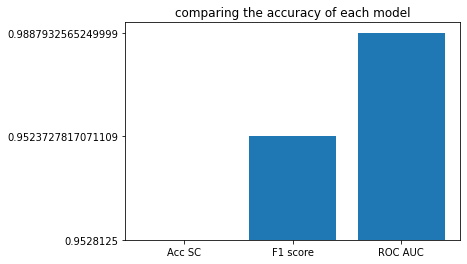

In [0]:
accuracy_array = [format(accuracy_score(test_labels, 1 * (preds > 0.5))),format(f1_score(test_labels, 1 * (preds > 0.5))),format(roc_auc_score(test_labels, preds))]
models_used = ['Acc SC', 'F1 score', 'ROC AUC']
Accuracy_pos = np.arange(len(models_used))
plt.bar(Accuracy_pos, accuracy_array)
plt.xticks(Accuracy_pos, models_used)
plt.title('comparing the accuracy of each model')
plt.show()

In [0]:
history_rnn.history.keys()

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])

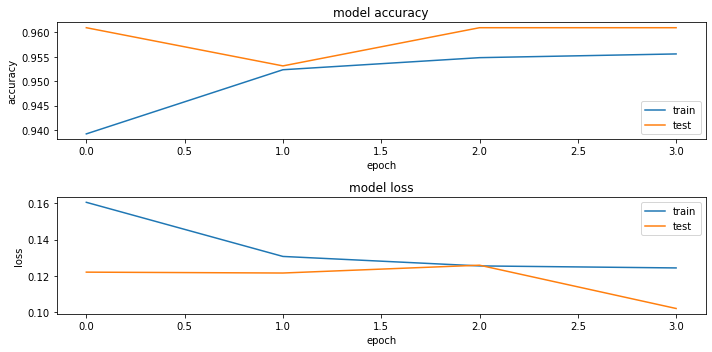

In [0]:
fig = plt.figure(figsize=(10,5))
plt.subplot(2,1,1)
plt.plot(history_rnn.history['binary_accuracy'])
plt.plot(history_rnn.history['val_binary_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(history_rnn.history['loss'])
plt.plot(history_rnn.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')

plt.tight_layout()